In [87]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [1]:

import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('spam.csv', encoding='latin1')  

df  # UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte
    # and so used encoding='latin1'

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**last 3 columns has more than 95% missing  so we are dropping  those columns**

In [5]:
df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4" ],inplace =True)

In [6]:
df.sample(5)

,v1,v2
200,ham,I sent you &lt;#&gt; bucks
1311,ham,U r too much close to my heart. If u go away i...
4413,ham,How stupid to say that i challenge god.You don...
2517,ham,"Sorry, I'll call later"
1758,ham,Sorry i'm not free...


In [7]:
df.rename(columns= {'v1':'target','v2': 'text'},inplace =True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target']= encoder.fit_transform(df['target'])

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [13]:
duplicate = df[df.duplicated()]
duplicate.head(20)

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
338,0,"Sorry, I'll call later"
356,1,Congratulations ur awarded 500 of CD vouchers ...
443,0,"Sorry, I'll call later"
532,0,Gudnite....tc...practice going on
654,0,Did u got that persons story


In [14]:
df= df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

## EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

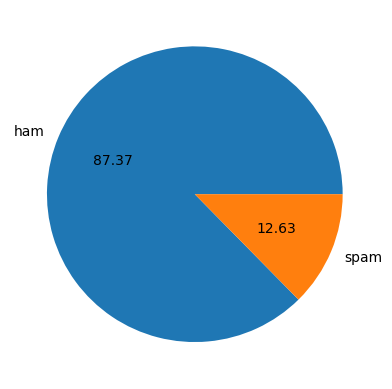

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels= ['ham','spam'], autopct= '%0.2f')
plt.show()

**Data is imbalanced**

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters']= df['text'].apply(len)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_1672\3630017924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['text'].apply(len)


In [21]:
df.head(10)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [22]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Kiran\AppData\Local\Temp\ipykernel_1672\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentence'] =df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Kiran\AppData\Local\Temp\ipykernel_1672\4066391148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] =df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [25]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters', 'num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
df[df['target']==0][['num_characters', 'num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
df[df['target']==1][['num_characters', 'num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

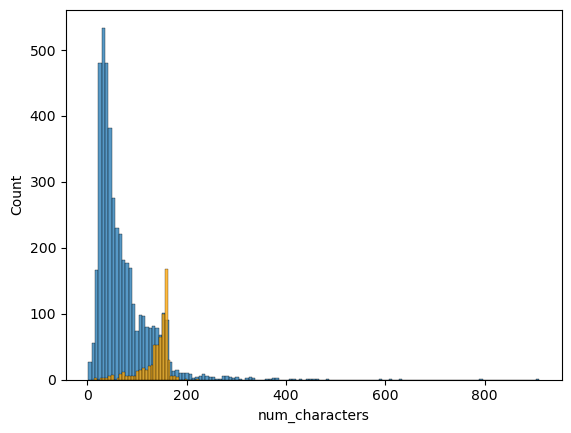

In [30]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color ='orange')

<Axes: xlabel='num_words', ylabel='Count'>

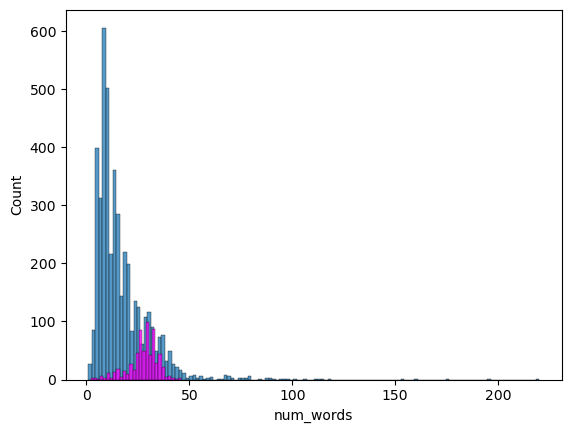

In [31]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color ='magenta')

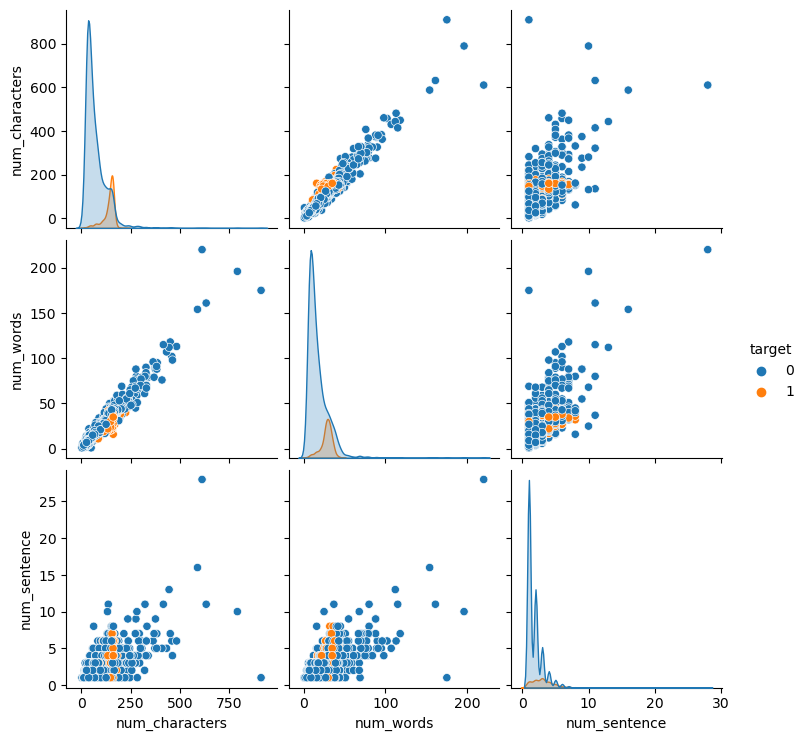

In [32]:
sns.pairplot(df,hue= 'target')

Preprocessing:
1. lower case
2. tokenization
3. remove special character
4. removing stop words and punctuation
5. stemming

In [33]:
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem import PorterStemmer
ps= PorterStemmer()

def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)
            

In [34]:

transform('did you like my presentation (20 on ml')

'like present 20 ml'

In [35]:
df['transformed_text'] = df['text'].apply(transform)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_1672\4143821896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform)


In [36]:
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [37]:
from wordcloud import WordCloud  # this shows below box that shows most occuring spam words 
wc = WordCloud(height =500, width = 500, min_font_size= 10, background_color= 'white')

In [38]:
spam_wc =wc.generate(df[df['target']== 1] ['transformed_text'].astype(str).str.cat(sep = " "))

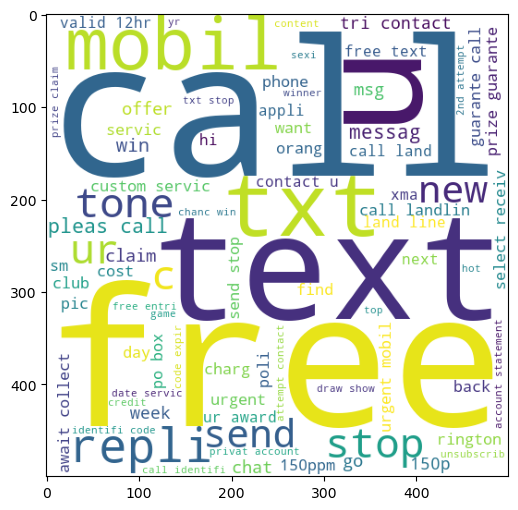

In [39]:
plt.figure(figsize=(7,6))   
plt.imshow(spam_wc)

**large size words are those which appear most in spam**

In [40]:
spamcorpus = []
for msg in df[df['target']==1]['transformed_text'].astype(str).tolist():
    for word in msg.split():
        spamcorpus.append(word)

In [41]:
len(spamcorpus)

9939

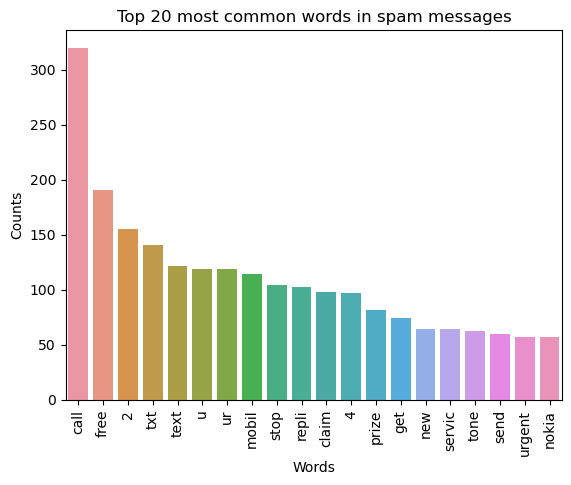

In [42]:
from collections import Counter
spam_counter =Counter(spamcorpus).most_common(20)
spam_df = pd.DataFrame(spam_counter, columns = ['word','count'])

sns.barplot(x= 'word',y='count', data=spam_df)

plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 most common words in spam messages')
plt.show()

## Model buliding

In [43]:
# text vectorization with BOW  as Naive bayes gives best result on textual data
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X =cv.fit_transform(df['transformed_text']).toarray()

In [44]:
X.shape

(5169, 6708)

In [89]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
y= df['target'].values

In [46]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 2)

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [52]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [55]:
X =tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5169, 6708)

In [57]:
y= df['target'].values

In [58]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 2)

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [61]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


TP = 96 (spam emails correctly predicted as spam)

TN = 896 (ham emails correctly predicted as not spam)

FP = 0 (no ham emails incorrectly predicted as spam)

FN = 42 (spam emails incorrectly predicted as ham)

In [62]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


**Precision score matters most here as data is imbalanced so Multinomial is giving best result. With zero False positive**

In [63]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [64]:
clfs = {
    'SVC': svc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [65]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [66]:
train_classifier(svc,X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [67]:
from sklearn.metrics import accuracy_score, precision_score

accuracy_scores =[]
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9365079365079365


In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.959381,1.000000
4,RF,0.973888,1.000000
7,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
5,AdaBoost,0.961315,0.945455
3,LR,0.951644,0.940000
9,xgb,0.972921,0.936508
8,GBDT,0.952611,0.923810
6,BgC,0.958414,0.862595
2,DT,0.935203,0.838095


In [69]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [70]:
tfidf = TfidfVectorizer(max_features = 3000) # it can be 500, 1000...etc. campus X found 3000 giving good result

In [71]:
X =tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X.shape

(5169, 3000)

In [73]:
y= df['target'].values

In [74]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 2)

In [75]:
mnb2 = MultinomialNB()

In [76]:
mnb2.fit(X_train,y_train)
y_pred2 = mnb2.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


**Here result of mnb much bettter with hyperparameter tuning of max features**

In [77]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [78]:
clfs = {
    'SVC': svc,
    'NB': mnb2,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [79]:
accuracy_scores =[]
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.959381,1.000000,0.970986,1.000000
1,RF,0.973888,1.000000,0.974855,0.982759
2,ETC,0.975822,0.982906,0.974855,0.974576
3,SVC,0.972921,0.974138,0.975822,0.974790
4,AdaBoost,0.961315,0.945455,0.960348,0.929204
5,LR,0.951644,0.940000,0.958414,0.970297
6,xgb,0.972921,0.936508,0.966151,0.925620
7,GBDT,0.952611,0.923810,0.947776,0.920000
8,BgC,0.958414,0.862595,0.957447,0.867188
9,DT,0.935203,0.838095,0.930368,0.817308


In [81]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
RF = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()
from sklearn.ensemble import VotingClassifier

In [82]:
voting = VotingClassifier(estimators=[('svm', svc),('rf', rfc), ('nb', mnb2), ],voting='soft')


In [83]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [84]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [85]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9831932773109243


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb2,open('model.pkl','wb'))